# Exploring the Dynamics of Crime in `South Africa(2011-2023)` 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")


In [3]:
crime_incid = pd.read_excel(r"C:\Users\Admin\Documents\Documents\Books\My important documents\Python\Projects\EDA\South Africa Crime 2010-2023.xlsx")
crime_incid.head(5)

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223


## Data Cleaning and Manipulation

In [4]:
crime_incid.shape

(840, 4)

In [5]:
crime_incid.dtypes

Geography         object
Crime Category    object
Financial Year    object
Count              int64
dtype: object

In [6]:
#unique values in the crime category column
crime_incid['Crime Category'].unique()

array(['Contact Crimes', 'Sexual Offences', 'Aggravated Robberies',
       'Contact Related Crimes', 'Property Related Crimes',
       'Other Serious Crimes',
       'Crimes Detected as a Result of Police Action'], dtype=object)

In [7]:
#finding unique value in the province column
geo = crime_incid['Geography'].unique()
geo

array(['ZA', 'EC', 'FS', 'GT', 'KZN', 'LIM', 'MP', 'NW', 'NC', 'WC'],
      dtype=object)

In [8]:
#renaming the column
crime_incid.rename(columns={'Count': 'Total'}, inplace=True)
crime_incid.rename(columns={'Geography': 'Province'}, inplace=True)
crime_incid.rename(columns={'Financial Year': 'Year'}, inplace=True)


In [9]:
#droping the column ZA
crime_incid.drop(crime_incid[crime_incid['Province'] == 'ZA'].index, inplace=True)


In [10]:
#declaring the crime category as string type variable
crime_incid['Crime Category'] = crime_incid['Crime Category'].astype(str)
crime_incid['Total'] =crime_incid['Total'].astype(float)



In [11]:
#renaming the values in the province column
crime_incid['Province'] = crime_incid['Province'].replace({'EC': 'Eastern Cape', 'FS': 'Free State', 'GT': 'Gauteng',
                                                            'KZN':'KwaZulu-Natal', 'LIM':'Limpopo','MP':'Mpumalanga'
                                          ,'NW':'North West', 'NC':'Nothern Cape','WC':'Western Cape'})


In [12]:
crime_incid.head(5)

,Province,Crime Category,Year,Total
10,Eastern Cape,Contact Crimes,2011/2012,75779.0
11,Eastern Cape,Contact Crimes,2012/2013,72650.0
12,Eastern Cape,Contact Crimes,2013/2014,73032.0
13,Eastern Cape,Contact Crimes,2014/2015,68654.0
14,Eastern Cape,Contact Crimes,2015/2016,67258.0


In [13]:
#dropping the duplicate rows in the dataframe
drop= crime_incid.drop_duplicates

In [14]:
#Looking for null values
crime_incid.isnull().sum()

Province          0
Crime Category    0
Year              0
Total             0
dtype: int64

## Exploratory Analysis

In [92]:
#The summary statistics of the crime_incid dataframe variables
crime_incid.describe()

,Total
count,756.000000
mean,34440.037037
std,39131.115933
min,377.000000
25%,7166.000000
50%,20919.000000
75%,37839.750000
max,204990.000000


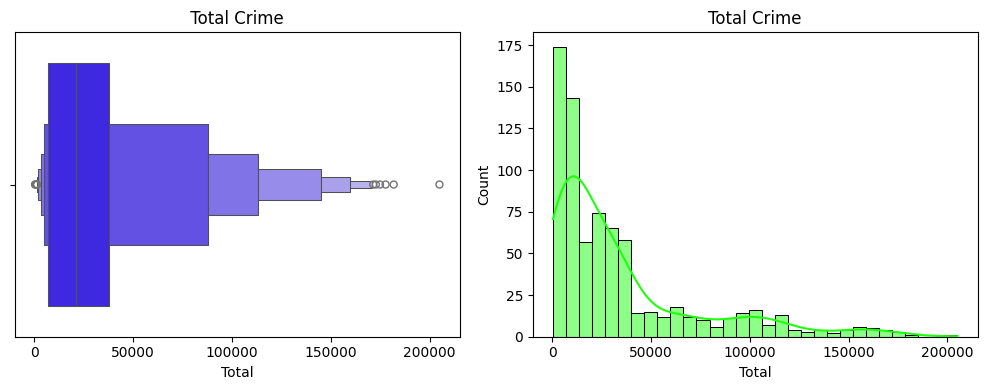

In [131]:
#Distribution and Boxen plot of the Total crime around the country
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxenplot(x=crime_incid['Total'], orient='h', ax=axes[0], color="#270aff")
axes[0].set_title(' Total Crime ')

sns.histplot(crime_incid['Total'], kde=True, ax=axes[1], color="#1eff0e"  )
axes[1].set_title('Total Crime')

plt.tight_layout()

plt.show()


Distribution is very `right skewed` not close to being normal

In [126]:
#pivot table of crime across provinces with value [Total] and the index as [Year]
pivot = crime_incid.pivot_table(columns='Province', index='Year', values='Total')
pivot = pivot.round(2)
pivot.head(6)


Province,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Nothern Cape,Western Cape
Year,,,,,,,,,
2011/2012,33049.29,19197.86,86811.86,52842.71,17150.14,18390.00,16966.71,6804.86,66614.00
2012/2013,32253.29,20046.29,87719.57,54940.57,17070.00,18213.14,17616.14,7201.43,69526.86
2013/2014,32589.29,19163.71,95548.43,53919.29,17803.00,17443.29,17328.86,7379.71,71602.86
2014/2015,31421.86,18038.86,96053.43,52767.86,18914.14,17596.43,17424.86,7506.00,73923.43
2015/2016,30337.43,17791.00,94088.29,51898.29,19563.57,17909.86,17414.57,7622.43,73513.71
2016/2017,30830.29,17330.00,94569.43,51834.14,19213.86,18537.29,17669.14,7630.00,73759.71


In [110]:
crime_total = pivot.select_dtypes(include='number')

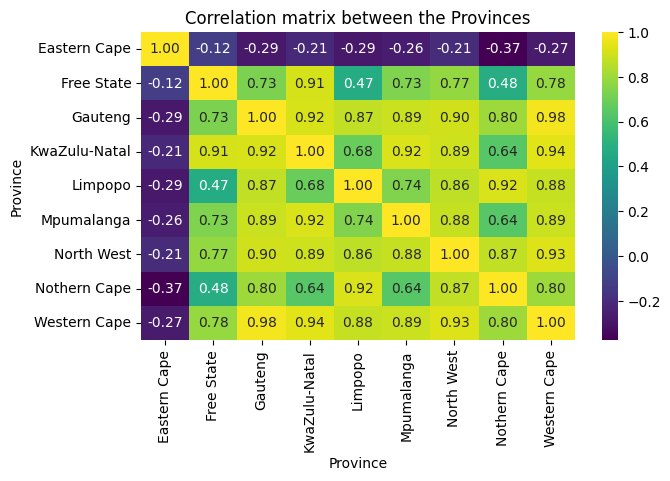

In [127]:
#correlation matrix plot between all all provinces in the country
corr_matrix = crime_total.corr()

plt.figure(figsize=(7, 4))
palette = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr_matrix, cmap=palette, annot=True, fmt=".2f")
plt.title('Correlation matrix between the Provinces')

plt.show()

Most provinces have a very high correlation except for `Eastern Cape` which show a negetive correlation with all provices

In [16]:
#grouping by year
group_year = crime_incid.groupby('Year')['Total'].sum().reset_index()

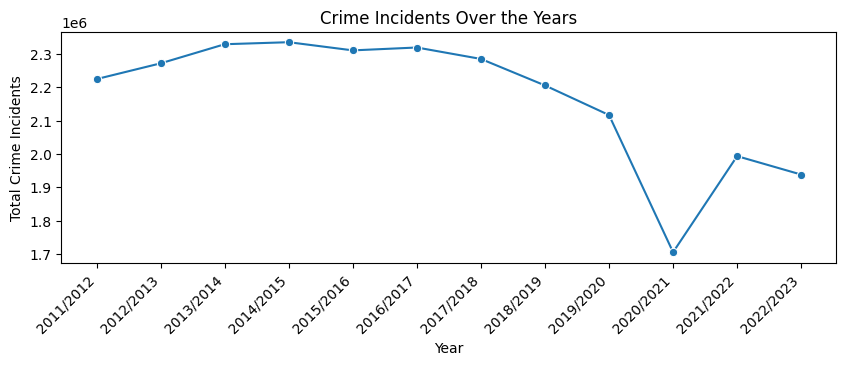

In [17]:
#Total crime over time line chart plot
plt.figure(figsize=(10, 3))
sns.lineplot(x='Year', y='Total', data=group_year, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.title('Crime Incidents Over the Years')
plt.xticks(rotation=45, ha='right') 

plt.show()

In [18]:
#grouping by crime, category and Year
group_crime_and_year = crime_incid.groupby(['Crime Category', 'Year'])['Total'].sum().reset_index()

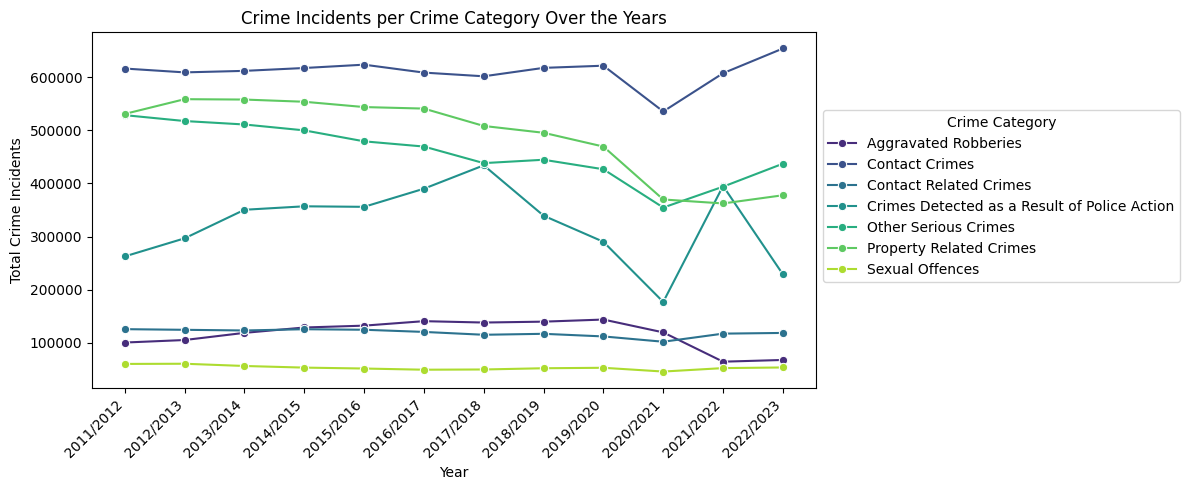

In [19]:
#Different crime category overtime line chart plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Total', hue='Crime Category', data=group_crime_and_year, palette='viridis', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.title('Crime Incidents per Crime Category Over the Years')
plt.legend(title='Crime Category', bbox_to_anchor=(1, 0.8), loc='upper left')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


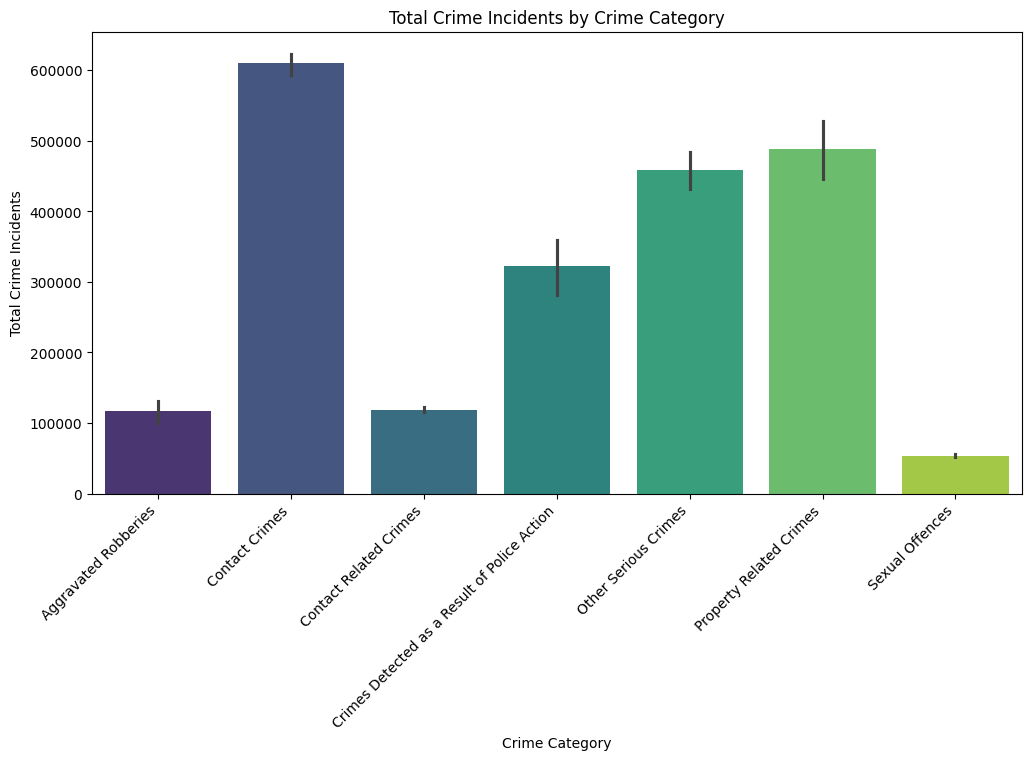

In [20]:
#bar(column) chart of different crime category 
plt.figure(figsize=(12, 6))
sns.barplot(x='Crime Category', y='Total', data=group_crime_and_year, palette='viridis')

plt.xlabel('Crime Category')
plt.ylabel('Total Crime Incidents')
plt.title('Total Crime Incidents by Crime Category')

plt.xticks(rotation=45, ha='right')  

plt.show()

In [21]:
#creating a new dataframe that contains the Province and Total crime
province_and_total = crime_incid[['Province', 'Total']]
province_and_total.head(3)

,Province,Total
10,Eastern Cape,75779.0
11,Eastern Cape,72650.0
12,Eastern Cape,73032.0


In [22]:
#group the new dataframe by Province
group_Province_to_Total = crime_incid.groupby('Province')['Total'].sum().reset_index()

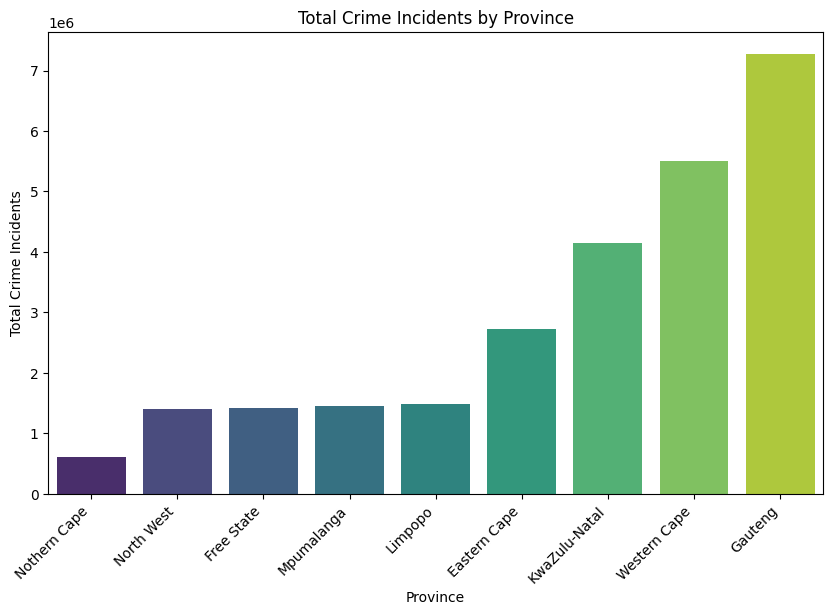

In [23]:
#bar chart of crime incidents in different provinces 
group_Province_to_Total = group_Province_to_Total.sort_values(by='Total')

plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Total', data=group_Province_to_Total, palette='viridis')

plt.xlabel('Province')
plt.ylabel('Total Crime Incidents')
plt.title('Total Crime Incidents by Province')
plt.xticks(rotation=45, ha='right') 

plt.show()

In [65]:
#importing the provinces shapefile using geopandas 
sa_provinces = gpd.read_file(r'C:/Users/Admin/Documents/Documents/Books/My important documents/zaf_adm_sadb_ocha_20201109_shp/sa_provinces.shp')
sa_provinces.head(2)

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,ADM1_ID,geometry
0,28.227301,16.154668,Eastern Cape,ZA2,None,None,None,South Africa,ZA,2018-12-27,2020-11-09,None,EC,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005..."
1,24.249857,11.979428,Free State,ZA4,None,None,None,South Africa,ZA,2018-12-27,2020-11-09,None,FS,"POLYGON ((27.97704 -26.67141, 27.97754 -26.671..."


In [67]:
#renaming the "ADM1_EN" to Province to merge the shapefile(sa_provinces) and the crime_incid dataframe
sa_provinces.rename(columns={"ADM1_EN": "Province"}, inplace=True)

In [68]:
sa_provinces["Province"].unique()

array(['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal',
       'Limpopo', 'Mpumalanga', 'North West', 'Nothern Cape',
       'Western Cape'], dtype=object)

In [84]:
#creating a new dataframe with selected columns from the shapefile dataframe
selected_columns = sa_provinces[['Province', 'geometry']].copy()
selected_columns.drop_duplicates(inplace=True)


In [90]:
#merging the selected columns from the shapefil end the crime_incid dataframe
joined_df = pd.merge(selected_columns, crime_incid, on='Province', how='inner')
joined_df.head(2)

,Province,geometry,Crime Category,Year,Total
0,Eastern Cape,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005...",Contact Crimes,2011/2012,75779.0
1,Eastern Cape,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005...",Contact Crimes,2012/2013,72650.0


In [87]:
group_province_to_total = joined_df.groupby(['Province', 'geometry'])['Total'].sum().reset_index()

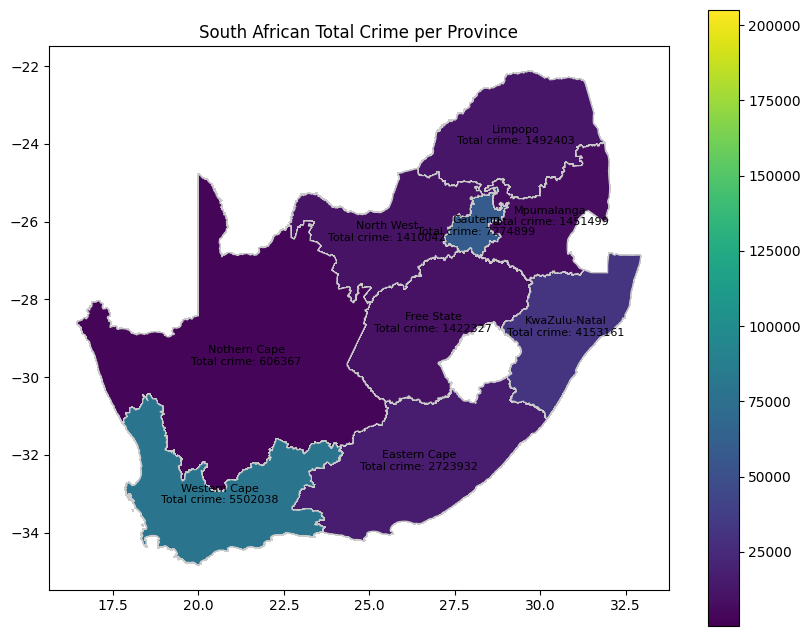

In [88]:
#Geo plot of the total crime in South Africa on each province
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

joined_df.plot(column='Total', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

centroids = joined_df.geometry.centroid

for province, total in zip(group_province_to_total['Province'], group_province_to_total['Total']):
    province_geom = joined_df[joined_df['Province'] == province].geometry.iloc[0]
    x, y = province_geom.centroid.x, province_geom.centroid.y
    ax.text(x, y, f'{province}\nTotal crime: {total:.0f}', fontsize=8, ha='center', va='center', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('South African Total Crime per Province')

plt.show()